<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Classification-Projects/blob/main/03-Glass_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Glass Dataset

In [ ]:
# load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Access Dataset
data = pd.read_csv('glass.csv')
# Data preparation and Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head(), '\n')

Number of Rows:  214
Number of Columns:  10 

SubSet of Data:
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 



### Data visualization

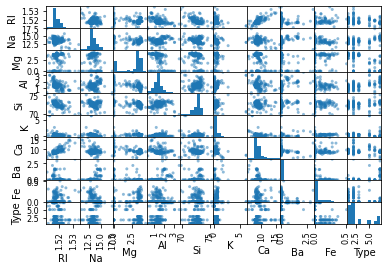

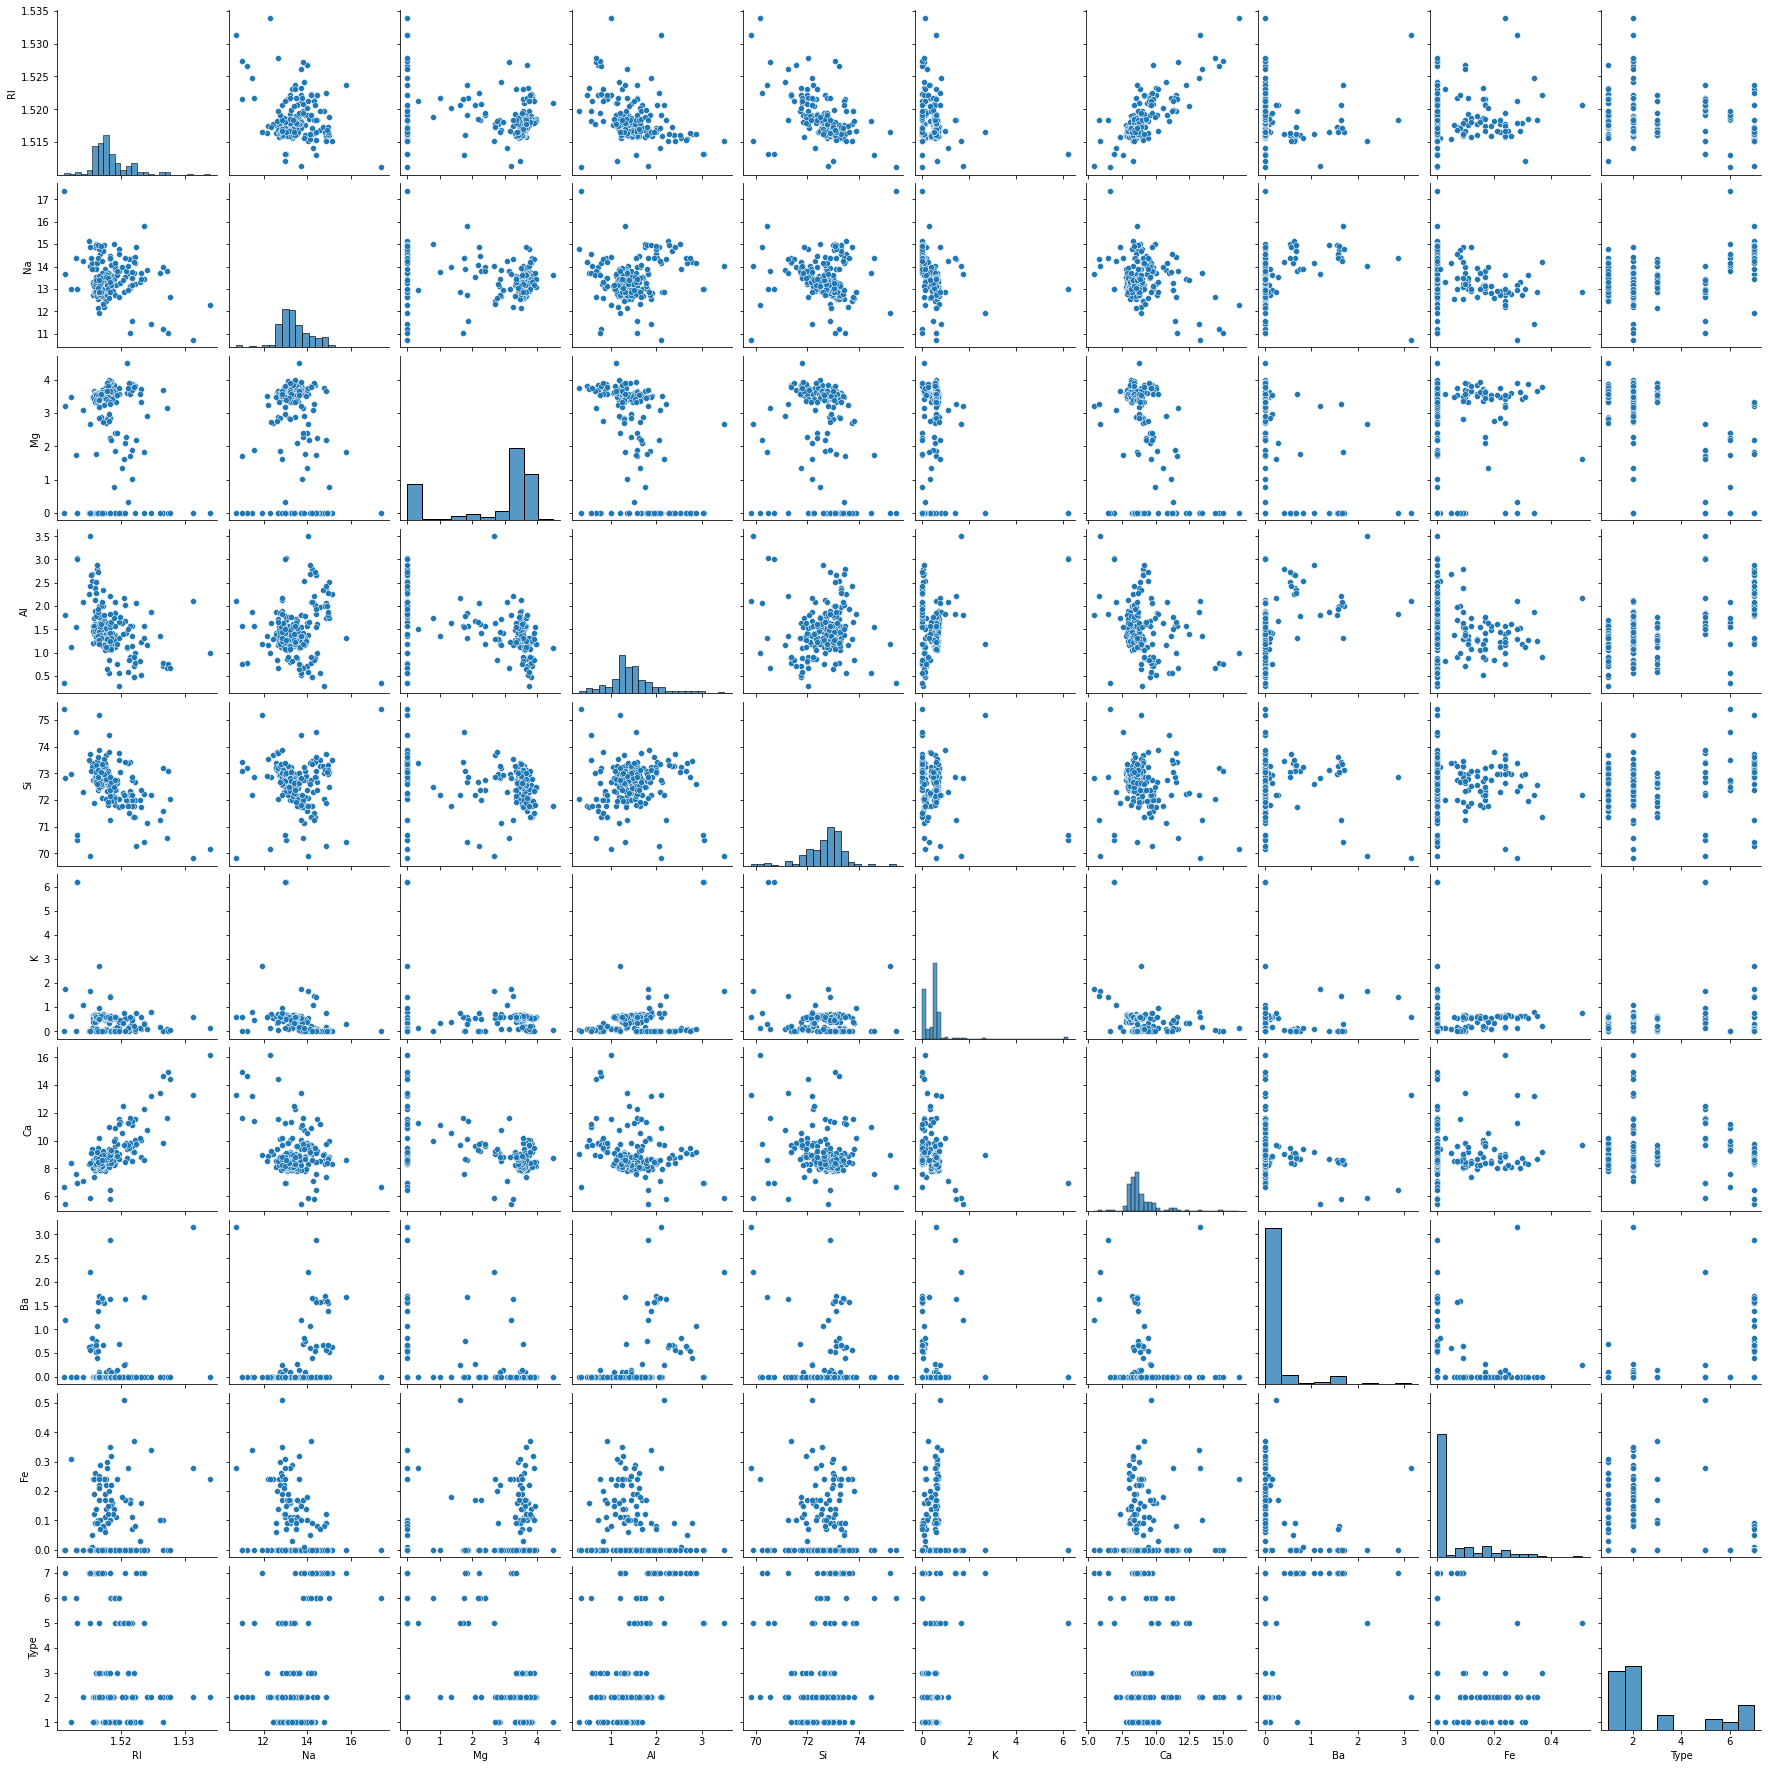

In [ ]:
# Data Visualization
# scatter matrix
scatter_matrix(data)
plt.show()
# pairplot
sns.pairplot(data)
plt.show()

C:\Users\EL_NASHAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


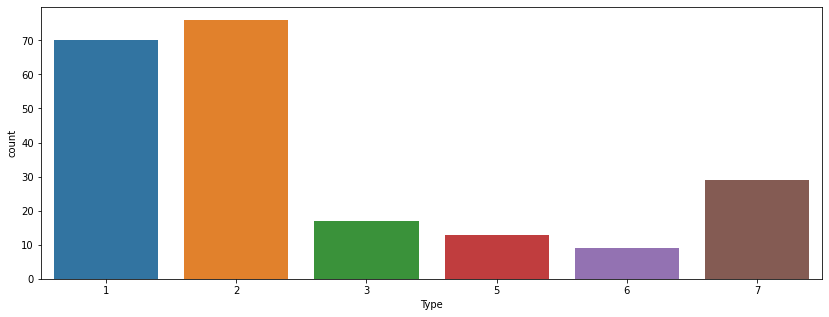

In [ ]:
# Type classes count
fig = plt.figure(figsize=(14, 5))
sns.countplot(data['Type'])
plt.show()

Correlation
Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64


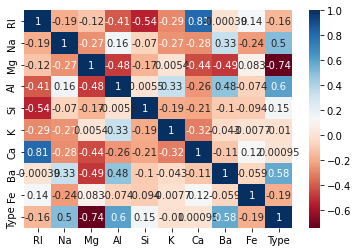

In [ ]:
# Check correlation
print('Correlation')
print(data.corr()['Type'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()


In [ ]:
# X & y
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)


108    2
206    7
106    2
107    2
51     1
      ..
48     1
172    5
66     1
197    7
89     2
Name: Type, Length: 86, dtype: int64
[7 7 7 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2
 2 2 2 2 7 7 2 7 2 2 2 2 7 2 2 2 2 7 2 7 2 1 7 2 2 2 2 2 2 2 2 7 2 2 2 2 2
 2 2 2 2 2 7 7 2 5 2 7 2]


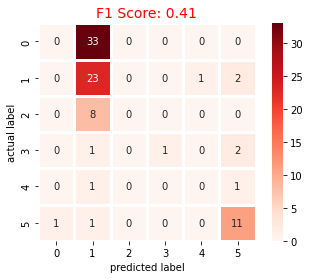

0.40697674418604657


In [ ]:
# Naive Bayes Algorithm
NB = MultinomialNB()
model = NB.fit(x_train, y_train)
y_predicted = NB.predict(x_test)
print(y_test)
print(y_predicted)
# confusion matrix and f1 score
f1_score_mnb = f1_score(y_test, y_predicted, average='micro')
cm_mnb = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_mnb:.2f}', size=14,color='red')
plt.show()
print(f1_score_mnb)

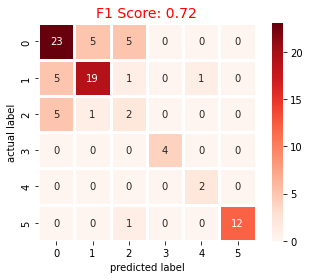

'\nThis data is imbalanced classification\nThe KNN Algorithm is better than Naive Bayes according to F1 score\n'

In [ ]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)
# if n_neighbors == 1 or 4 the F1 is proportionally the same !!
# confusion matrix and f1 score
f1_score_knn = f1_score(y_test, y_predicted, average='micro')
cm_knn = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Reds', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_knn:.2f}', size=14, color='red')
plt.show()

# Notes:
'''
This data is imbalanced classification
The KNN Algorithm is better than Naive Bayes according to F1 score
'''
